In [1]:
## Grid World Example
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Grid World Example
This is an example for a value function iteration for the grid world with a $5 \times 5$ grid. From each cell, four actions are possible, each with a move of 1 cell in the north, south, east and west directions. The rewards for states and actions is as follows:
1. An action bringing the agent outside of the grid bounds results in a reward of -1
2. All actions from the cell $\left[ 0,1 \right]$ would bring the agent to the cell $\left[ 4,1 \right]$ with a reward of +10
3. All actions from the cell $\left[ 0,3 \right]$ would bring the agent to the cell $\left[ 2,3 \right]$ with a reward of +5
4. All other actions from any cell would yield a reward of 0.

The agent selects all the actions with the same probability. The discount factor for each move is $\gamma = 0.9$

The grid and its rewards are illustrated below.
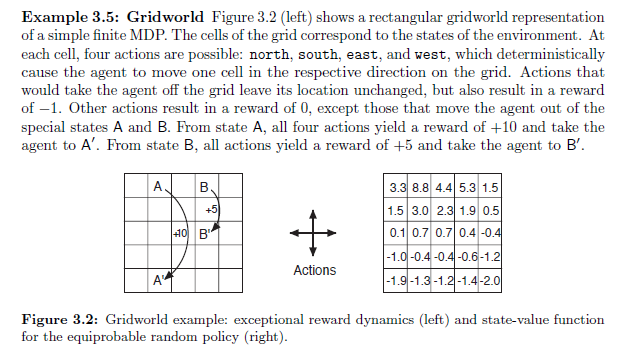

## Approach
The value function (policy) is given as:
$$ v_\pi (s) = \sum_a{\pi(a|s)} \sum_{a,s'}{p(s',r|a,s) \left(r + \gamma v_\pi (s')\right)}  $$

For the grid, we have deterministic transitions for each action, which implies that $p(s',r|a,s) = 1$ for all valid transitions.

The above equation for the grid becomes:

$$ v_{\pi} (i,j) = \sum_a{\frac{1}{4}} \sum_{k,l}{\left(r + \gamma v_\pi (k,l) {}\right)}  $$
where $(k,l)$ is a cell adjacent to $(i,j)$ in the north,west,east and south directions.

Aggregating and solving the linear equations for all the cells, we get an equation of the form:
$$ \mathbf{A} \mathbf{v_\pi} = \mathbf{r} $$
where $\mathbf{v_\pi}$ and $\mathbf{r}$ represents the arrays from aggregating the values and rewards at each cell. The value functions are then obtained as follows:
$$ \mathbf{v_\pi} = \mathbf{A}^{-1} \mathbf{r} $$


In [2]:
m = 5
n = 5
gamma = 0.9
grid = [[0 for j in range(m*n)] for i in range(m*n)]
reward = [0 for i in range(m*n)]
def getAdjacencyMatrix(i,j,gamma):
    steps = [[-1,0],[1,0],[0,-1],[0,1]]
    idx_0 = i*n+j
    if i == 0 and j == 1:
        reward[idx_0] += 10
    elif i == 0 and j == 3:
        reward[idx_0] += 5
    for s in steps:
        if i == 0 and j == 1:
            r = m-1
            c = j
        elif i == 0 and j == 3:
            r = i+2
            c = j
        else:
            r = min(m-1,max(0,i+s[0]))
            c = min(n-1,max(0,j+s[1]))
        if r == i and c == j:
            reward[idx_0] -= 1/(float(len(steps)))
        idx = r*n + c
        grid[idx_0][idx] += gamma/(float(len(steps)))
    
for i in range(m):
    for j in range(n):
        getAdjacencyMatrix(i,j,gamma)

In [3]:
A_mat = np.eye(m*n) - np.matrix(grid)

In [4]:
A_mat_inv = np.linalg.inv(A_mat)
val_func = np.matmul(A_mat_inv,np.matrix(reward).T)

print("State Value Function: ")
print(np.reshape(np.round(val_func,1),(m,n)))

State Value Function: 
[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]
